## The galactic chemical evolution (GCE) correlation line for SiC mainstream grains

In this example, we will use `pgdtools` in order to plot the silicon isotopic composition of SiC mainstream grains.
This could later also be fitted, however, 
as this is an example of `pgdtools`, we will leave it at simple data retrieving, filtering, and plotting.

Let us first import the module as recommended when working with the database. 
If this is the first time you are using `pgdtools` this might take a bid,
as the tool downloads the database from the internet.

In [1]:
import matplotlib.pyplot as plt

from pgdtools import pgd

Let us now filter the data for only the SiC database and then for mainstream grains:

In [2]:
pgd.filter.db(pgd.DataBase.SiC)
pgd.filter.pgd_type("M")

Now we define the x and y isotope ratios that we want to plot. 
Then we will get (1) the data and (2) some nice labels that we can directly put on the axes of the plot.
Finally, we will show the results in a plot.

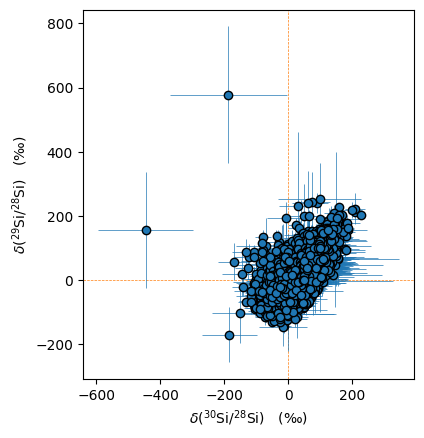

In [3]:
x_ratio = ("30Si", "28Si")
y_ratio = ("29Si", "28Si")

xdata, xunc, ydata, yunc, corr = pgd.data.ratio_xy(x_ratio, y_ratio, simplify_unc=True)
x_label = pgd.format.ratio(x_ratio)
y_label = pgd.format.ratio(y_ratio)

fig, ax = plt.subplots(1, 1)
ax.axhline(0, color="tab:orange", linestyle="--", linewidth=0.5)
ax.axvline(0, color="tab:orange", linestyle="--", linewidth=0.5)
ax.errorbar(
    xdata, ydata, xerr=xunc, yerr=yunc, fmt="o", mec="k", label="SiC M", linewidth=0.5
)
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_aspect(1)

Well, this does not look like in most papers that discuss the SiC mainstream grains GCE correlation line.
There are also some outliers with very large uncertainties.
How many data points are there in total?

In [4]:
pgd.info.number_of_grains;

Number of grains in current selection: 16951


This is a lot of grains, no wonder we cannot see much. 
Let us filter further and only show points with uncertainties smaller than 10‰.

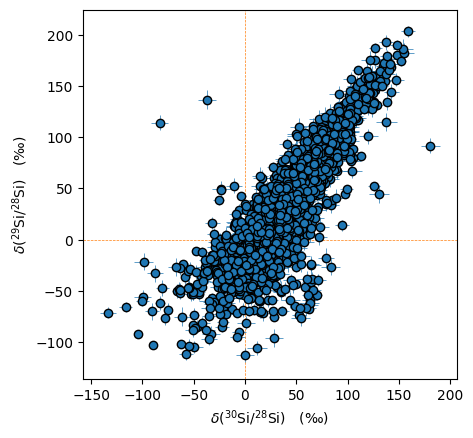

In [6]:
pgd.filter.uncertainty(x_ratio, "<", 10)
pgd.filter.uncertainty(y_ratio, "<", 10)

xdata, xunc, ydata, yunc, corr = pgd.data.ratio_xy(x_ratio, y_ratio, simplify_unc=True)

fig2, ax2 = plt.subplots(1, 1)
ax2.axhline(0, color="tab:orange", linestyle="--", linewidth=0.5)
ax2.axvline(0, color="tab:orange", linestyle="--", linewidth=0.5)
ax2.errorbar(
    xdata, ydata, xerr=xunc, yerr=yunc, fmt="o", mec="k", label="SiC M", linewidth=0.5
)
ax2.set_xlabel(x_label)
ax2.set_ylabel(y_label)
ax2.set_aspect(1)

This looks a lot better now!

### Some further notes:

- Various methods for filtering are available in `pgdtools`. 
  If something is not available, you could filter manually on the pandas dataframe available in `pgd.db`.
- Getting the ratio with `simplify_unc` returns a 1D Series for all uncertainties, since all silicon uncertainties are symmetric.
  If you had asymmetric uncertainties, you would have to transpose the return dataframe prior to plotting it.
  Without the `simplify_unc=True` option, the uncertainties are returned as a 2D dataframe.
  To plot those, you would have to transpose the dataframe as well!